# Resumo:

Meu objetivo é avaliar a distribuição dos casos de covid-19 e compará-los com a distribuição de casos de Síndrome Respiratória Aguda Grave (SRAG), causada por diversos vírus respiratórios. Desta forma, avaliando o comportamento dessas duas manifestações e agentes causadores, com intuito de conscientização para o futuro.
*** 
**Definição de alguns termos**:
1. Síndrome Respiratória Aguda Grave (SRAG) - complicação respiratória grave que pode ser causada por vários vírus respiratórios (Influenza, Parainfluenza, SarS-CoV, etc);
2. Covid-19 - doença causada pelo SarS-Cov-2, pandemia de 2020.;
3. SARS - doença causada pelo SarS-Cov, registrada nos anos de 2002 e 2003. 
<br> **Importante**: O termo SARS em inglês é equivalente à tradução do termo SRAG. Neste notebook, os termos SARS e SRAG serão usados com significados diferentes, apontados nos itens 1 e 2.

## Guia para o notebook:
<font color='Gray'> >> </font> Textos precedidos de sinais na cor <font color='Gray'> Cinza </font> são comentários gerais feitos por mim. <br>
<font color='Red'> >> </font> Textos precedidos de sinais na cor <font color='Red'> Vermelha </font> são questionamentos que tentarei responder. <br>
<font color='Blue'> >> </font> Textos precedidos de sinais na cor <font color='Blue'> Azul </font> são respostas e hipóteses levantadas por mim para responder aos questionamentos anteriores.

## Fonte dos dados

1. Covid-19 - Dados foram coletados da iniciativa [Brasil.io](https://brasil.io/dataset/covid19/), e o nome das bases selecionadas são `caso.csv` e `caso_full.csv`;
2. Dados de gripes e Síndrome Respiratória Aguda Grave (SRAG) - foram coletados da iniciativa [InfoGripe](http://info.gripe.fiocruz.br/) da FIOCRUZ, mais especificamente a base `serie_temporal_com_estimativas_recentes_sem_filtro_febre.csv`*;
*** 
***Obs**: a base de dados completa contém um grande número de entradas, considerando diversos níveis de registros. Para utilizar no meu projeto, processei a base previamente, extraíndo dados mais gerais, a nível de: país, casos, ambos os sexos e etc. Informações completas de como eu fiz essa filtragem podem ser encontradas [aqui](https://github.com/souzajvp/data_science_bootcamp/blob/main/modulo_01/dataset_gripe.ipynb).

Importando módulos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
%matplotlib inline


# Analisando dados de Covid-19

<font color='Gray'> >> </font> Decidi fazer o upload do arquivo 'casos.csv.gz' no meu [github](https://github.com/souzajvp/data_science_bootcamp/tree/main/modulo_01) para facilitar a importação e automatizar o processo para futuros leitores. 
***
 

In [2]:
url = 'https://github.com/souzajvp/data_science_bootcamp/blob/main/modulo_01/caso.csv.gz?raw=true'
dados = pd.read_csv(url, compression='gzip')

In [3]:
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-03,AP,NaN,state,52832,751,228,True,845731.0,861773.0,16.0,6130.61676,0.0142
1,2020-11-02,AP,NaN,state,52653,749,227,False,845731.0,861773.0,16.0,6109.84563,0.0142
2,2020-11-01,AP,NaN,state,52500,748,226,False,845731.0,861773.0,16.0,6092.09154,0.0142
3,2020-10-31,AP,NaN,state,52175,748,225,False,845731.0,861773.0,16.0,6054.37859,0.0143
4,2020-10-30,AP,NaN,state,52030,747,224,False,845731.0,861773.0,16.0,6037.55281,0.0144


### <font color='Gray'> >> </font> Analisando os valores nulos da base `caso.csv`

Primeiro, vamos dar uma olhada nos dados faltantes e nas variáveis presentes neste banco...

In [4]:
dados.isnull().sum(axis=0)

date                                  0
state                                 0
city                               6383
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3672
estimated_population               3672
city_ibge_code                     3672
confirmed_per_100k_inhabitants    16999
death_rate                            0
dtype: int64

<font color='Blue'> >> </font>**Notamos que as colunas que tem valores `NaN` são:**
***
 - city;
 - estimated_population_2019;
 - estimated_population;
 - city_ibge_code;
 - confirmed_per_100k_inhabitants.
 

<font color='Red'> >> </font> Certo, mas e **quanto aos tipos de dados** em cada coluna? </font>

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940388 entries, 0 to 940387
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            940388 non-null  object 
 1   state                           940388 non-null  object 
 2   city                            934005 non-null  object 
 3   place_type                      940388 non-null  object 
 4   confirmed                       940388 non-null  int64  
 5   deaths                          940388 non-null  int64  
 6   order_for_place                 940388 non-null  int64  
 7   is_last                         940388 non-null  bool   
 8   estimated_population_2019       936716 non-null  float64
 9   estimated_population            936716 non-null  float64
 10  city_ibge_code                  936716 non-null  float64
 11  confirmed_per_100k_inhabitants  923389 non-null  float64
 12  death_rate      

<font color='Blue'> >> </font> Notamos como os números faltantes de `estimated_population_2019`, `estimated_population` e `city_ibge_code` são os mesmos.

In [6]:
dados.query('city_ibge_code == "NaN"').city.value_counts()

Importados/Indefinidos    3672
Name: city, dtype: int64

<font color='Blue'> >> </font> Pelo visto, estes 3672 dados faltantes na verdade são de casos classificados como origem "Importados/Indefinidos".

<font color='Red'> >> </font> Mas e quanto aos dados faltantes na coluna `city`?

In [7]:
city_null_pop = dados[dados['city'].isnull() == True]['estimated_population'].unique()

In [8]:
print(f'Temos {len(city_null_pop)} valores únicos na colulna estimated_population que tem valores nulos na coluna city' )
print(f'E estes sãos os valores únicos {city_null_pop}')


Temos 27 valores únicos na colulna estimated_population que tem valores nulos na coluna city
E estes sãos os valores únicos [  861773.   894470.  4207714.  3055149.  3351543.  9187103.  4064052.
 14930634.  2809394.  7114598.  7113540.  3526220.  8690745.  4039277.
  9616621. 21292666.  3281480.  1796460. 17366189.  3534165. 11516840.
   631181.  2318822.  7252502. 11422973.  1590248. 46289333.]


<font color='Blue'> >> </font> Aparentemente, as linhas que contém dados nulos para `city` são linhas contendo atualizações de cada estado.


## <font color='Gray'> >> </font> Agrupando os dados a nível de estado

<font color='Gray'> >> </font> A base de dados `caso.csv` traz os dados segmentados a nível de município ou a nível de estado. Agradeço ao [@reiskleiton](https://github.com/reiskleiton) pela ajuda com esse código.

In [9]:
# criando cópia do dataset
dados_covid_estados = dados.copy()
# realizando query para selecionar somente os estados
dados_covid_estados = dados_covid_estados.query("place_type == 'state' ")
# deletando a variável city
dados_covid_estados.drop('city', axis= 1, inplace= True)
dados_covid_estados.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-03,AP,state,52832,751,228,True,845731.0,861773.0,16.0,6130.61676,0.0142
1,2020-11-02,AP,state,52653,749,227,False,845731.0,861773.0,16.0,6109.84563,0.0142
2,2020-11-01,AP,state,52500,748,226,False,845731.0,861773.0,16.0,6092.09154,0.0142
3,2020-10-31,AP,state,52175,748,225,False,845731.0,861773.0,16.0,6054.37859,0.0143
4,2020-10-30,AP,state,52030,747,224,False,845731.0,861773.0,16.0,6037.55281,0.0144


In [10]:
a = dados_covid_estados.query('state == "MG"')

<font color='Gray'> >> </font> Agora **vamos criar duas novas colunas**, contendo os novos casos [`new_cases`] e novos óbitos [`new_deaths`] em cada entrada. 
***
Isso é feito usando a função `.diff()` que subtrai os valores de uma entrada seguida da outra. Graças ao código do @reiskleiton, isso pode ser feito automaticamente para todo o DF de uma única vez. 

In [11]:
# ordenando dataset pela variável data
dados_covid_estados.sort_values(by=['state', 'date'], ascending=True, inplace=True)
# criando uma lista com todos os estados no datset
lista_estados = dados_covid_estados.state.unique()
# criando a lista de lista de todos os novos casos utilizando a função diff para cada estado
novos_casos = [dados_covid_estados.query('state == @estado')['confirmed'].diff() for estado in lista_estados]
novos_obitos = [dados_covid_estados.query('state == @estado')['deaths'].diff() for estado in lista_estados]
# criando as novas variáveis [[new_cases, new_deaths]] no dataframe
dados_covid_estados['new_cases'] = [item for lista_estados in novos_casos for item in lista_estados]
dados_covid_estados['new_deaths'] = [item for lista_estados in novos_obitos for item in lista_estados]

dados_covid_estados.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,new_cases,new_deaths
3562,2020-03-17,AC,state,3,0,1,False,881935.0,894470.0,12.0,0.33539,0.0,NaN,NaN
3561,2020-03-18,AC,state,3,0,2,False,881935.0,894470.0,12.0,0.33539,0.0,0.0,0.0
3560,2020-03-19,AC,state,4,0,3,False,881935.0,894470.0,12.0,0.44719,0.0,1.0,0.0
3559,2020-03-20,AC,state,7,0,4,False,881935.0,894470.0,12.0,0.78259,0.0,3.0,0.0
3558,2020-03-21,AC,state,11,0,5,False,881935.0,894470.0,12.0,1.22978,0.0,4.0,0.0


<font color='Gray'> >> </font> Em seguida **vamos criar outras duas novas colunas**, contendo a média móvel de novos casos  [`media_movel_casos`] e novos óbitos [`media_movel_obitos`], utilizando as colunas criadas anteriormente. 


In [12]:

# criando a lista de lista de todos os novos casos utilizando a função diff para cada estado
mm_obitos = [dados_covid_estados.query('state == @estado')['new_deaths'].rolling(window=7).mean() for estado in lista_estados]
mm_casos = [dados_covid_estados.query('state == @estado')['new_cases'].rolling(window=7).mean() for estado in lista_estados]

# criando a nova variável [media_movel] no dataframe
dados_covid_estados['media_movel_obitos'] = [item for lista_estados in mm_obitos for item in lista_estados]
dados_covid_estados['media_movel_casos'] = [item for lista_estados in mm_casos for item in lista_estados]


### <font color='Red'> >> </font>  Quais são os estados com maior número de casos confirmados?

In [13]:
print('Unidades da Federação com maior número de casos de covid-19 confirmados* \n')
display(dados_covid_estados.query('is_last == True').sort_values(by='confirmed', ascending=False)[['state', 'confirmed']].head())
print('\n *Número de casos confirmados baseados na última data disponível neste banco')

Unidades da Federação com maior número de casos de covid-19 confirmados* 



,state,confirmed
825491,SP,1125936
373883,MG,368609
89828,BA,362563
551278,RJ,315348
40144,CE,278053



 *Número de casos confirmados baseados na última data disponível neste banco


In [14]:
# Filtrando para apenas os estados mais afetados
dados_covid_estados_top5 = dados_covid_estados.query('state == "SP" | state == "MG"| state == "BA" | state == "RJ" | state == "CE"')

# Setando o índice
dados_covid_estados_top5.set_index('date', inplace=True)

# Criando um DF para usar o índice de forma eficaz
a = dados_covid_estados_top5.query('state == "MG"')

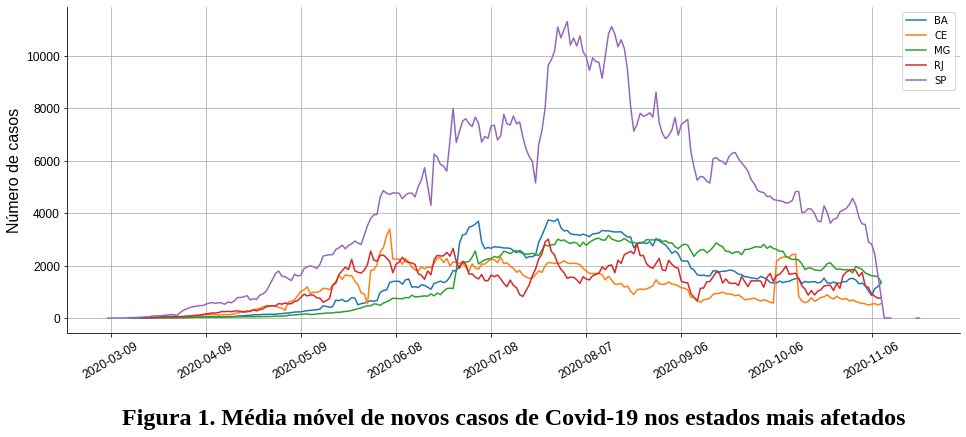

In [15]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x=dados_covid_estados_top5.index, y=dados_covid_estados_top5['media_movel_casos'], 
                  data=dados_covid_estados_top5, hue='state')
sns.despine()

plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figura 1. Média móvel de novos casos de Covid-19 nos estados mais afetados', fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.3)
plt.ylabel('Número de casos', fontsize=16, fontname="Liberation Sans")
plt.xlabel('')

# Criando xticks separados por 30:
pos = [i for i in range(1, len(a.index), 30)]
  
l = []
for i in pos:
  l.append(a.index[i])

plt.grid()
ax.set(xticks=pos, xticklabels=l);

plt.legend();

<font color='Blue'> >> </font> Aqui vemos como São Paulo, Minas Gerais, Rio de Janeiro, Ceará e Bahia são os 5 estados com maior número de casos do Brasil. Dentre esses estados, podemos destacar SP e MG que são os dois estados mais populosos do Brasil e esse tamanho populacional por si só pode influenciar a quantidade de novos casos. <br>
Sabemos que o estado de SP foi uma das portas de entrada do vírus no Brasil, e isso pode ter influenciado nesse crescimento e número de casos. Adicionalmente, o estado de SP é o mais rico e que faz o maior número de testes, o que favorece à contabilização dos casos.<br>
<font color='Blue'> >> </font> Considerando esses fatores que podem influenciar na quantidade total de casos registrados, esse número por si só não nos diz muito. Analisar o número de mortes e a mortalidade do vírus em cada estado pode nos dar uma noção mais segura da real situação enfrentada. 


#### <font color='Red'> >> </font> E se levarmos em conta a proporção de casos a cada 100.000 habitantes?

In [16]:
dados_covid_estados.query('is_last == True').sort_values(by='confirmed_per_100k_inhabitants', ascending=False)[['state', 'confirmed_per_100k_inhabitants']].head()

,state,confirmed_per_100k_inhabitants
655093,RR,9357.85456
19833,DF,7065.12186
0,AP,6130.61676
805771,TO,4825.59953
258284,MT,4160.20555


<font color='Blue'> >> </font> Ao levarmos em conta os casos a cada 100 mil habitantes, o Top 5 estados mais afetados muda completamente. <br>
<font color='Gray'> >> </font> É importante destacar que estados que possuem populações pequenas vão ter índices desproporcionais ao utilizar este tipo de comparação. Um exemplo é RR, que conta com a menor população por UF no Brasil.<br>

### <font color='Red'> >> </font>  E quanto aos índices de morte e mortalidade? Os mesmos estados se repetem?

#### <font color='Red'> >> </font> Total de mortes

In [17]:
print('Estados com maior número de mortes por covid-19* \n')
display(dados_covid_estados.query('is_last == True').sort_values(by='deaths', ascending=False)[['state', 'deaths']].head())
print('\n *Quantidade de mortes baseadas na última data disponível neste banco')

Estados com maior número de mortes por covid-19* 



,state,deaths
825491,SP,39717
551278,RJ,20905
40144,CE,9395
373883,MG,9204
337660,PE,8724



 *Quantidade de mortes baseadas na última data disponível neste banco


In [18]:
mortes_estados_top = dados_covid_estados.query('state == "SP" | state == "MG"| state == "PE" | state == "RJ" | state == "CE"')

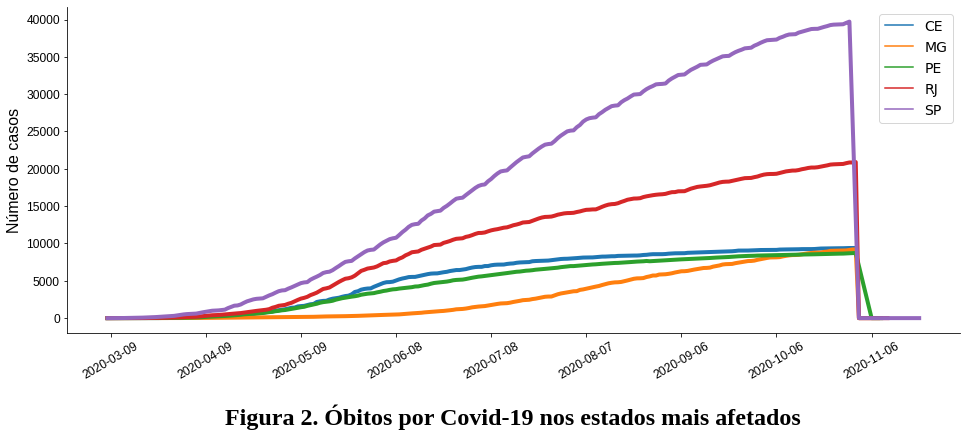

In [19]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x=mortes_estados_top['date'], 
                  y=mortes_estados_top['deaths'], 
                  data=mortes_estados_top, hue='state', linewidth=4)
sns.despine()

plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figura 2. Óbitos por Covid-19 nos estados mais afetados', fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.3)
plt.ylabel('Número de casos', fontsize=16, fontname="Liberation Sans")
plt.xlabel('')

# Criando xticks separados por 30:
pos = [i for i in range(1, len(a.index), 30)]
  
l = []
for i in pos:
  l.append(a.index[i])

ax.set(xticks=pos, xticklabels=l);

plt.legend(fancybox=True, fontsize=14,);

<font color='Blue'> >> </font> Diferentemente do número total de casos, RJ e CE sobem no rank total de mortes. CE (9,6 milhões) e PE (~9 milhões) se destacam negativamente, uma vez que não possuem população tão grande quanto os outros estados rankeados (SP 46,2M; MG 21,3M; RJ 17,3M) e ainda assim tem alto número de mortes.


#### <font color='Red'> >> </font> Mortalidade

In [20]:
print('Estados com maiores índices de mortalidade* \n')
display(dados_covid_estados.query('is_last == True').sort_values(by='death_rate', ascending=False)[['state', 'death_rate']].head())
print('\n *Considerando o índice mais recente')

Estados com maiores índices de mortalidade* 



,state,death_rate
551278,RJ,0.0663
337660,PE,0.0526
825491,SP,0.0353
40144,CE,0.0338
569926,RN,0.0315



 *Considerando o índice mais recente


<font color='Blue'> >> </font> Já quando levamos em conta a mortalidade, o Rio de Janeiro sobe ao primeiro lugar do ranking. 
***
<font color='Gray'> >> </font>Durante os últimos meses, a mídia divulgou diversas notícias mostrando como a situação do RJ estava crítica. Fator importante que pode ter influenciado na mortalidade maior do RJ são as populações que residem em comunidades (especialmente na capital do RJ). Estes grupos estão mais vulneráveis, tendo densidades demográficas mais altas, menor capacidade para distanciamento social, menos acesso à agua tratada e diversos outros fatores que podem influenciar na mortalidade por uma doença infectocontagiosa transmitida por gotículas. Exemplo da vulnerabilidade desses grupos é a comunidade do Jacarezinho, que concentra os maiores índices de Tuberculose no Brasil, doença transmitida de forma semelhante à covid-19, porém causada por uma bactéria. 
> * [Rio: 1,4 mil mortes por covid-19 foram em favelas, mostra painel](https://agenciabrasil.ebc.com.br/geral/noticia/2020-08/rio-14-mil-mortes-por-covid-19-foram-em-favelas-mostra-painel)
> * [Favela do RJ com maior foco de tuberculose do país tem poucas defesas contra coronavírus](https://noticias.uol.com.br/reportagens-especiais/comunidade-no-rio-tem-50-casos-de-tuberculose-e-poucas-defesas-contra-o-coronavirus/#cover)



In [21]:
mortalidade_estados_top =  dados_covid_estados.query('state == "SP" | state == "RN"| state == "PE" | state == "RJ" | state == "CE"')

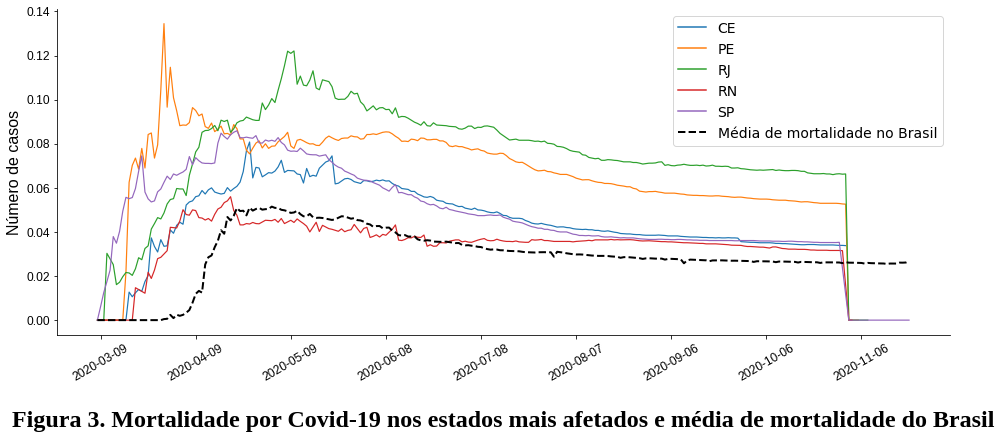

In [22]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x=mortalidade_estados_top['date'], 
                  y=mortalidade_estados_top['death_rate'], 
                  data=mortalidade_estados_top, hue='state', linewidth=1.2)
sns.despine()
ax2 = dados_covid_estados.groupby('date').mean()['death_rate'].plot(label='Média de mortalidade no Brasil', linestyle='dashed', color='black', linewidth=2)


plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figura 3. Mortalidade por Covid-19 nos estados mais afetados e média de mortalidade do Brasil', fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.3)
plt.ylabel('Número de casos', fontsize=16, fontname="Liberation Sans")
plt.xlabel('')

# Criando xticks separados por 30:
pos = [i for i in range(1, len(a.index), 30)]
  
l = []
for i in pos:
  l.append(a.index[i])

ax.set(xticks=pos, xticklabels=l);

plt.legend(fancybox=True, fontsize=14,);

<font color='Blue'> >> </font> No gráfico acima vemos como os estados com maiores índices de mortalidade na verdade apresentam índices maiores que o índice nacional. <br>
<font color='Blue'> >> </font>Além disso, vemos como a mortalidade por covid mostrou uma tendência de queda após o pico da pandemia, se mantendo mais estável. 

## Covid-19 a nível de país

<font color='Gray'> >> </font>Para avaliar os dados de Covid-19 a nível de País, eu utilizei a base `casos_full` do Brasil.io. 
*** 
Em seu formato original, essa base tem um tamanho grande demais para o GitHub. Assim, processei ela anteriormente, removendo dados a nível de município e fiz upload no meu GitHub.

In [23]:
url = 'https://github.com/souzajvp/data_science_bootcamp/blob/main/modulo_01/casos_full_state.csv.gz?raw=true'
full_state = pd.read_csv(url, compression='gzip')

In [24]:
full_state.head()

,Unnamed: 0,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,SP,1,0
1,3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,SP,0,0
2,5,NaN,35.0,2020-02-27,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0,0,3,state,SP,0,0
3,7,NaN,35.0,2020-02-28,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0,0,4,state,SP,1,0
4,9,NaN,35.0,2020-02-29,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0,0,5,state,SP,0,0


In [25]:
# Removendo algumas colunas desnecessárias
full_state.drop(['city', 'city_ibge_code', 'Unnamed: 0'], axis=1, inplace=True)

# Agrupando o DF anterior para obter valores a a nível de estado:
full_pais = full_state.groupby('date').sum()

# Criando novas colunas para avaliar a média móvel de óbitos e de novos casos:
full_pais['media_movel_obitos']= full_pais['new_deaths'].rolling(7,1).mean() 
full_pais['media_movel_casos']= full_pais['new_confirmed'].rolling(7,1).mean() 

### <font color='Red'> >> </font>  Como a letalidade da Covid-19 variou em relação ao avanço de novos casos?

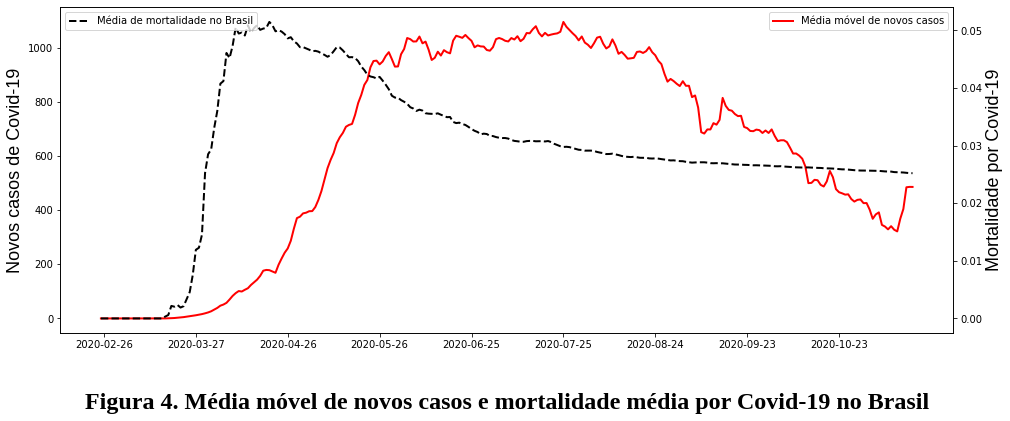

In [26]:
fig= plt.figure(figsize=(16,6))

line_weight=3
alpha=0.8

ax1 = sns.lineplot(x=full_pais.index, y=full_pais['media_movel_obitos'], 
                  data=full_pais, color='red', linewidth=2, label='Média móvel de novos casos')

ax2 = fig.add_axes()
ax2 = ax1.twinx()
ax2 = full_state.groupby('date').mean()['last_available_death_rate'].plot(label='Média de mortalidade no Brasil', linestyle='dashed', color='black', linewidth=2)

ax1.set_ylabel('Novos casos de Covid-19', fontsize=18, fontname="Liberation Sans")
ax2.set_ylabel('Mortalidade por Covid-19', fontsize=18, fontname="Liberation Sans")
ax1.set_xlabel('')

plt.legend(loc='upper left')
plt.title('Figura 4. Média móvel de novos casos e mortalidade média por Covid-19 no Brasil',
          fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.25)
# Criando xticks separados por 30:
pos = [i for i in range(1, len(full_pais.index), 30)]

l = []
for i in pos:
  l.append(full_pais.index[i])

ax1.set(xticks=pos, xticklabels=l);
ax1.legend(loc='upper right')
plt.show()

<font color='Blue'> >> </font>No gráfico acima, vemos como o comportamento das variáveis em questão é bem diferente. Enquanto que nos primeiros ~4 meses da pandemia, tivemos índices de mortalidade altos, o índice de mortalidade reduziu para uma taxa estável a partir de julho. Ao mesmo tempo, a quantidade de novos casos tem reduzido dese o pico observado.<br>
***
Possíveis explicações para estes fenômenos:
1. O conhecimento científico e experiência clínica sobre pacientes com formas graves de Covid-19 aumentou, fazendo com que os profissionais da saúde estejam melhor preparados para salvar vidas;
2. A saturação do sistema de saúde observada em diversas localidades fez com que nem todos os doentes pudessem ser atendidos. Em situações extremas, os profissionais da saúde eram obrigados a priorizar doentes mais jovens ou com maior chance de recuperação, em detrimento de outros;
3. No começo da pandemia, poucos centros de atendimento dispunham de quantidade e complexidade de equipamentos (ex: ventiladores mecânicos) e insumos adequados para atender os doentes de forma suficiente;
4. Possível influência do clima na transmissão viral e consequente aumento dos casos - este tópico será discutido com maior detalhe abaixo.

***

**Obs**: É importante ressaltar que mesmo que o mundo esteja mais equipado e preparado para lidar com a Covid-19, uma situação onde voltemos a ter um número grande de infectados em um pequeno período de tempo pode ser catastrófica.

# <font color='Red'> >> </font> Existe chance de segunda onda de Covid-19? Ou melhor... Devemos nos preocupar com a segunda onda?

<font color='Blue'> >> </font>Assim como visto nos gráficos acima, o número de novos casos diários de covid-19 e a mortalidade da doença reduziram considerávelmente desde o pico da pandemia no país. Mesmo assim, continuamos registrando muitas mortes diárias e, infelizmente estima-se que o número real de casos seja muito maior [(pelo menos 5 vezes)](https://ciis.fmrp.usp.br/covid19-subnotificacao/) que o reportado.<br>

**Apesar dessa questão não ser nada trivial**, temos algumas evidências preocupantes sobre o futuro da pandemia. <br> O começo de 2020 foi marcado como o começo da pandemia de covid-19 na Ásia e no hemisfério Norte. Este período, condizia também com o final do inverto no hemisfério norte e começo das temperaturas mais quentes. <br>
Agora, a Europa está passando por semanas de aumento consecutivo nos casos de covid-19, até mesmo batendo recordes estabelecidos no começo do ano. Sendo assim, vários países já estabaleceram "lockdowns" parciais ou completos em regiões mais afetadas.  Considerando o encaminhamento para o inverno no hemisfério norte, a relação entre sazonalidade e a covid vai ficando mais clara.<br>
***
Outra doença que tem sido usada como comparativo para a Covid-19, é a Gripe. Vários vírus podem causar uma sintomatologia semelhante à gripe, e também a Sídrome Respirtatória Aguda Grave (SRAG), manifestação mais severa. Desta forma, decidi avaliar também dados de Síndrome Respiratória Aguda Grave relatados em anos anteriores à pandemia.

## <font color='Gray'> >> </font>SRAG a nível de país

<font color='gray'> >> </font> Como relatado anteriormente, coletei a base de dados de SRAG completa e fiz [algumas modificações](https://github.com/souzajvp/data_science_bootcamp/blob/main/modulo_01/dataset_gripe.ipynb) para reduzir o tamanho do arquivo, bem como facilitar o trabalho aqui.
***
**Importante:** Diferentemente do que acontece na pandemia de Covid-19, não era realizada testagem em massa da população para outros vírus causadores de SRAG (vírus Influenza, Parainfluenza e etc). Desta forma, não existem dados disponíveis que sejam da mesma escala que os dados de testagem de covid-19. Assim, no meu julgamento,  o mais justo é comparamos os obitos causados por SRAG-não covid (da base InfoGripe) versus obitos causados por Covid-19 (Brasil.io). 

Bixando o arquivo

In [27]:
url = 'https://raw.githubusercontent.com/souzajvp/data_science_bootcamp/main/modulo_01/gripe_pais_media.csv'
gripe_pais = pd.read_csv(url)

In [28]:
gripe_pais.columns

Index(['data de publicação', 'UF', 'Unidade da Federação', 'Tipo', 'dado',
       'escala', 'Ano epidemiológico', 'Semana epidemiológica',
       'Situação do dado',
       'Casos semanais reportados até a última atualização',
       'limite inferior da estimativa', 'casos estimados', 'média móvel',
       'limite superior da estimativa', 'Percentual em relação ao país',
       'População', 'limiar pré-epidêmico', 'intensidade alta',
       'intensidade muito alta', 'nível semanal', 'nível por média móvel'],
      dtype='object')

In [29]:
# Algumas colunas não serão necessárias para a avaliação dos dados...
gripe_pais = gripe_pais.drop(['Situação do dado', 'Tipo', 'escala', 'data de publicação', 'UF', 'Unidade da Federação' ], axis=1)

Separando dados <br>

In [30]:
gripe_pais.dado.unique()

array(['srag', 'sragflu', 'sragcovid', 'obito', 'obitoflu', 'obitocovid'],
      dtype=object)

<font color='gray'> >> </font> Notamos como existem diversas classificações para nossos dados e como dito anteriormente, trabalharei apenas com os óbitos. Farei as seguintes separações:
* Óbitos causados por SRAG - dataframe `obito`.

In [31]:
obito = gripe_pais.query("dado == 'obito'")

### <font color='red'> >> </font> Como é a distribuição de óbitos por SRAG em cada semana epidemiológica?

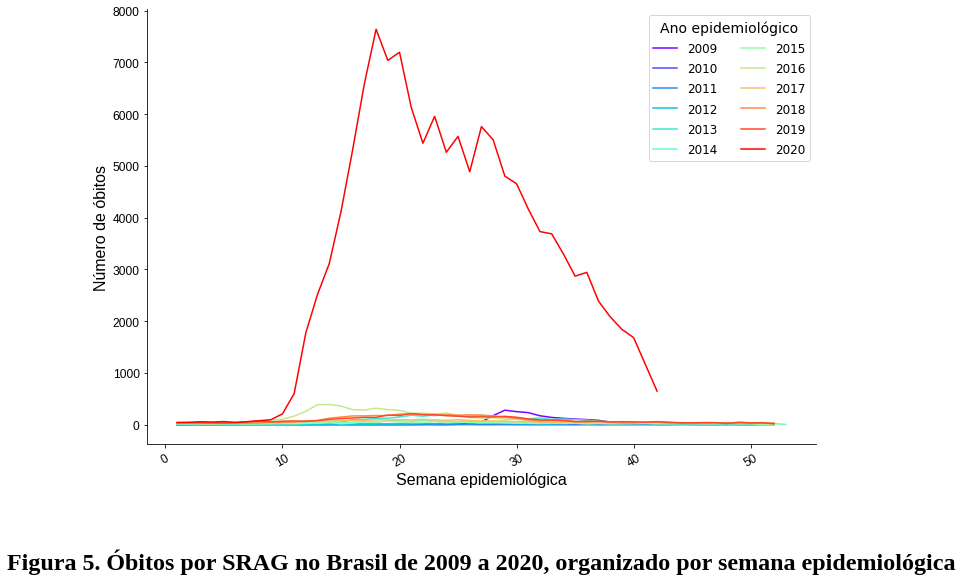

In [32]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=obito, x='Semana epidemiológica', y='Casos semanais reportados até a última atualização', hue='Ano epidemiológico', palette='rainbow')
plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figura 5. Óbitos por SRAG no Brasil de 2009 a 2020, organizado por semana epidemiológica', fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.3)
plt.ylabel('Número de óbitos', fontsize=16, fontname="Liberation Sans")
plt.xlabel('Semana epidemiológica', fontsize=16, fontname="Liberation Sans")
sns.despine()
ax.legend([*obito['Ano epidemiológico'].unique()], fontsize=12, labelspacing=0.6, title='Ano epidemiológico', title_fontsize=14, ncol=2)
# plt.legend(fontsize=12, columnspacing=0.6, labelspacing=0.6, title='Ano epidemiológico', title_fontsize=14)
plt.show()

<font color='blue'> >> </font>Fazendo esse plot simples acima, vemos como o ano de 2020 tem uma quantidade de óbitos por SRAG muito desproporcional. 

**Obs**: vários agentes infecciosos podem causar SRAG, porém o vírus SARS-CoV-2 aparenta ter um equilíbrio entre letalidade e transmissibilidade ideias para ter causado este impacto mundial. Como comparação, o vírus Influenza da gripe comum é transmitido a cada 3  dias, com letalidade média de [0.1%](https://www.who.int/news-room/q-a-detail/coronavirus-disease-covid-19-similarities-and-differences-with-influenza). Em comparação o SarS-CoV2 é transmitido a cada 5 ou 6 dias e as taxas de mortalidade média no Brasil está em [2.8%](https://covid.saude.gov.br/).

### <font color='Red'> >> </font> Vamos eliminar 2020 para ter uma comparação mais justa

In [33]:
obito['Ano epidemiológico'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [34]:
# Atualizando o DF, removendo os dados de 2020 para os óbitos gerais;
obito = obito.query('`Ano epidemiológico` != "2020"')

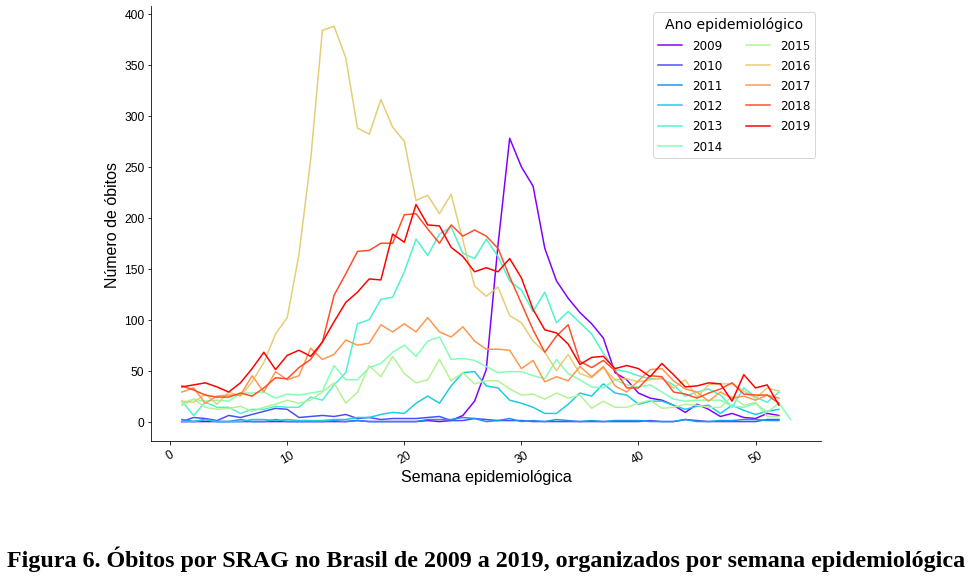

In [35]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=obito, x='Semana epidemiológica', y='Casos semanais reportados até a última atualização', hue='Ano epidemiológico', palette='rainbow')
plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figura 6. Óbitos por SRAG no Brasil de 2009 a 2019, organizados por semana epidemiológica', fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.3)
plt.ylabel('Número de óbitos', fontsize=16, fontname="Liberation Sans")
plt.xlabel('Semana epidemiológica', fontsize=16, fontname="Liberation Sans")
sns.despine()
ax.legend([*obito['Ano epidemiológico'].unique()], fontsize=12, labelspacing=0.6, title='Ano epidemiológico', title_fontsize=14, ncol=2)
plt.show()

<font color='blue'> >> </font>Após remover 2020, vemos como o gráfico fica um pouco mais homogêneo. Ainda assim, os anos de 2009 e 2016 se destacam bastante. <br>
**2009**: É importante lembrar que 2009 foi o ano em que a epidemia de gripe suína (causada pelo vírus Influenza A - H1N1) aconteceu. Apesar de a gripe suína não ser necessariamente mais letal, um problema enfrentado era que a população como um geral estava mais suscetível ao vírus e as vacinas anuais não forneciam proteção contra essa cepa viral. [Referência](https://www.cdc.gov/flu/pandemic-resources/2009-h1n1-pandemic.html) <br>
Outro ponto que chama a atenção é a diferença na sazonalidade dos óbitos de SRAG em 2009 vs dos outros anos. Uma possibilidade seria o tempo que a epidemia levou para chegar, se instalar e ser detectada no Brasil. Provavelmente, se avaliássemos os casos em países afetados precocemente, a sazonalidade de 2009 poderia ser mais semelhante. <br>
**2016**: Além de 2009, também houve epidemia de Influenza H1N1 em 2016. Diferente da pandemia de 2009, o mundo já estava mais preparado e as vacinas distribuídas mundialmente já protegiam melhor a população.
*** 
**Obs***: O banco InfoGripe começa com dados referentes a 2009. É possível que haja uma intereferência na real distribuição observada devido ao início do esforço para registrar esse tipo de informação.

### <font color='red'> >> </font> E se removermos 2009 e 2016? E que tal também utilizarmos a coluna `média móvel`?  

<font color='gray'> >> </font>De forma geral, a média móvel nos ajuda a analisar o comportamento dos nossos dados, reduzindo pequenos ruídos. Apesar de existirem diversos tipos, alguns exemplos podem ser encontrados neste [link](https://towardsdatascience.com/implementing-moving-averages-in-python-1ad28e636f9d). Segundo o [dicionário](https://gitlab.procc.fiocruz.br/mave/repo/tree/master/Dados/InfoGripe) de dados da base InfoGripe, a média móvel foi calculada para um período de 3 semanas.

In [36]:
# removendo anos epidêmicos do df geral
obito = obito.query('`Ano epidemiológico` != "2009" & `Ano epidemiológico` != "2016"')

In [37]:
obito['Ano epidemiológico'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018, 2019])

<font color='gray'> >> </font> Agora, vamos plotar a média móvel de casos por semana epidemiológica em cada ano e também um agrupamento por semana epidemiológica usando apenas a média dos óbitos.

**Obs***: Decidi fazer a média dos óbitos por semana epidemiológica, pois fazer a média das médias móveis não me pareceu algo muito "responsável".

In [38]:
obito_plot = obito.groupby('Semana epidemiológica')

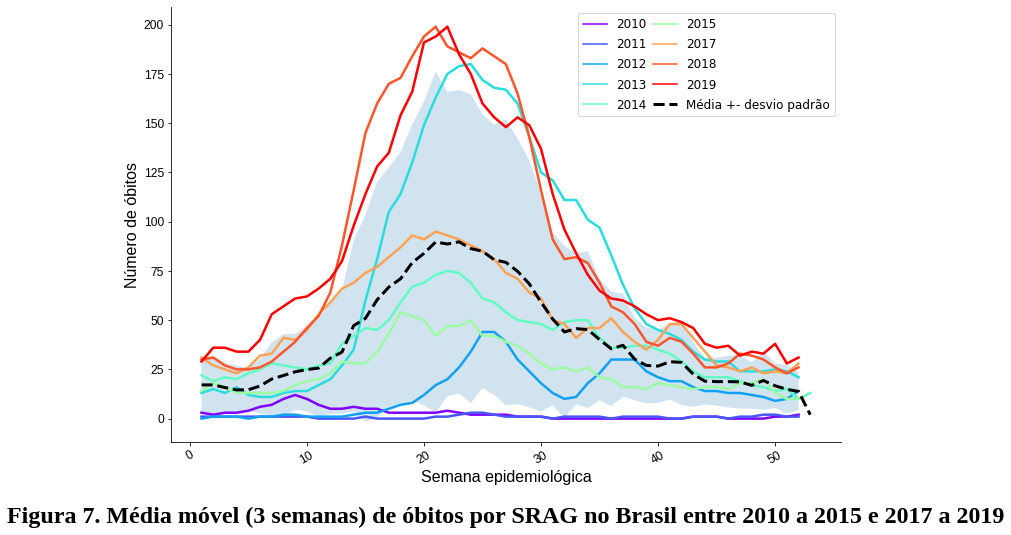

In [39]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=obito, x='Semana epidemiológica', y='média móvel', ci='sd', 
                  palette='rainbow', hue='Ano epidemiológico', legend='full', linewidth=2.5)
plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figura 7. Média móvel (3 semanas) de óbitos por SRAG no Brasil entre 2010 a 2015 e 2017 a 2019', fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.2)
plt.ylabel('Número de óbitos', fontsize=16, fontname="Liberation Sans")
plt.xlabel('Semana epidemiológica', fontsize=16, fontname="Liberation Sans")
sns.despine()
x = obito['Semana epidemiológica'].unique()
y_est = obito_plot.mean()['Casos semanais reportados até a última atualização']
y_err = obito_plot.std()['Casos semanais reportados até a última atualização']
ax.plot(x, y_est, 'k--', label='Média +- desvio padrão', linewidth=3)
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)

ax.legend(fontsize=12, labelspacing=0.6, ncol=2, columnspacing=0.5, fancybox=True)

plt.show()

<font color='blue'> >> </font> Agora temos uma ideia geral de como os óbitos por SRAG se distribuem nas semanas epidemiológicas, ano a ano. Apesar de um pouco variável, notamos que de forma geral, os óbitos tem um pico entre a semana epidemiológica 20 e 25, correspondentes ao final de maio e começo de junho. Se focarmos na média (*tracejado)* e desvio padrão (*área preenchida no gráfico*) de óbitos por SRAG semanais, vemos essa distribuição resumida. Desta forma, notamos a sazonalidade dos óbitos por SRAG no Brasil.

## <font color='gray'> >> </font>  Unindo as bases

####  Importando e a base de `casos_full_grouped` e crando dataframe para plotagem

<font color='gray'> >> </font>  Como a base `casos_full.csv` possuia um tamanho muito grande para o GitHub, processei ela, removendo dados a nível de município para anexar neste [link](https://github.com/souzajvp/data_science_bootcamp/blob/main/modulo_01/casos_full_grouped.csv.gz).

In [40]:
url = "https://github.com/souzajvp/data_science_bootcamp/blob/main/modulo_01/casos_full_grouped.csv.gz?raw=true"
casos_full_pais = pd.read_csv(url, compression='gzip')

In [41]:
casos_full_pais.head()

,epidemiological_week,city_ibge_code,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
0,9,175.0,2.314467e+08,2.295952e+08,0.0,0.0,7,0.01512,0.0000,0,15,2,0
1,10,551.0,4.212325e+08,4.180455e+08,0.0,1.0,50,0.23754,0.0000,0,79,17,0
2,11,2629.0,9.723243e+08,9.655304e+08,0.0,14.0,443,3.10819,0.0000,0,399,117,0
3,12,4692.0,1.357063e+09,1.346966e+09,0.0,19.0,3980,40.86336,0.1825,40,1230,996,18
4,13,5502.0,1.482290e+09,1.471030e+09,0.0,7.0,18782,204.97605,1.1806,450,2485,2821,97


In [42]:
casos_full_pais.columns

Index(['epidemiological_week', 'city_ibge_code', 'estimated_population',
       'estimated_population_2019', 'is_last', 'is_repeated',
       'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'new_confirmed', 'new_deaths'],
      dtype='object')

In [43]:
# criando as novas variáveis [media_movel_obitos e media_movel_casos] no dataframe
casos_full_pais['media_movel_obitos'] = casos_full_pais['new_deaths'].rolling(window=3).mean()
casos_full_pais['media_movel_casos'] = casos_full_pais['new_confirmed'].rolling(window=3).mean()

In [44]:
# Antes de seguirmos com as análises, criei aqui três DFs contendo informações referentes aos 
# anos epidêmicos de H1N1
obito_pais = gripe_pais.query("dado == 'obito'")
obito_h1 = obito_pais.query('`Ano epidemiológico` == "2009" | `Ano epidemiológico` == "2016"')
obito_2016 = obito_pais.query('`Ano epidemiológico` == "2016"')
obito_2009 = obito_pais.query('`Ano epidemiológico` == "2009"')

Selecionando colunas desejadas do DF casos_full_pais para criar o DF full, para plotagem


In [45]:
lista = ['epidemiological_week', 'new_confirmed', 'new_deaths', 'media_movel_obitos',
       'media_movel_casos']
full = casos_full_pais[lista]

# Adicionando colunas contendo as médias móveis de SRAG estudadas até então.
full['srag_h1n1'] = (obito_h1.groupby('Semana epidemiológica').mean().
                     loc[9:48]['Casos semanais reportados até a última atualização'])
full['srag_2009'] = (obito_2009['média móvel'][9:48].tolist())
full['srag'] = (obito.groupby('Semana epidemiológica').mean().
                loc[9:47]['Casos semanais reportados até a última atualização'].tolist())
full['srag_2016'] = (obito_2016['média móvel'][9:48].tolist())

# Colocando o índice como a epidemiological_week
full.set_index('epidemiological_week', inplace=True)


### <font color='red'> >> </font>Distribuição de óbitos por Covid-19 (Brasil.io) versus óbitos SRAG não epidêmica 

Média móvel de óbitos por covid-19 (2020) versus média de mortes semanais por SRAG de 2009 a 2019, removendo os anos epidêmicos de H1N1 (2009 e 2016)

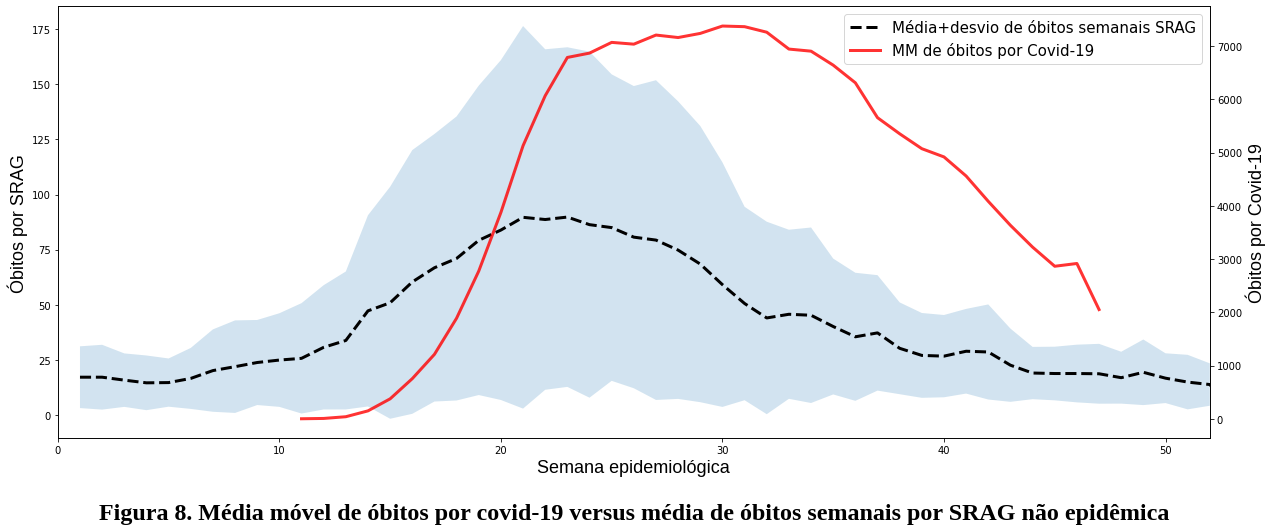

In [46]:
fig= plt.figure(figsize=(16,6))

line_weight=3
alpha=0.8
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes()

ax2 = ax1.twinx()

x = obito['Semana epidemiológica'].unique()
y_est = obito_plot.mean()['Casos semanais reportados até a última atualização']
y_err = obito_plot.std()['Casos semanais reportados até a última atualização']

lns1 = ax1.plot(x, y_est, 'k--', label='Média+desvio de óbitos semanais SRAG', linewidth=3)

# lns1 = ax1.plot(full['srag'], color='black', linestyle='dashed', 
#                 lw=4, alpha=alpha, label='Média de óbitos por SRAG' )
lns2 = ax2.plot(full['media_movel_obitos'], color='red', 
                lw=line_weight, alpha=alpha, label='MM de óbitos por Covid-19' )

ax1.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)

ax1.set_ylabel('Óbitos por SRAG', fontsize=18, fontname="Liberation Sans")
ax2.set_ylabel('Óbitos por Covid-19', fontsize=18, fontname="Liberation Sans")
ax1.set_xlabel('Semana epidemiológica', fontsize=18, fontname="Liberation Sans")
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best', prop=dict(size=15))


plt.title('Figura 8. Média móvel de óbitos por covid-19 versus média de óbitos semanais por SRAG não epidêmica',
          fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.2)
plt.xlim((0,52))
plt.show()

<font color='blue'> >> </font>Notamos a semelhança na inclinação das curvas, apesar dos picos não estarem sobrepostos na mesma semana epidemiológica. É possível que esse deslocamento seja causado pelo início "tardio" dos casos de covid-19 em comparação com outros países. Possívelmente, ao analisar dados de países atingidos mais precocemente pela covid-19, teríamos distribuições mais semelhantes. Como o Brasil "demorou" a ser afetado pela pandemia, medidas de isolamento puderam ser tomadas de antemão, assim "segurando" o avanço dos casos e consequentemente, dos óbitos. Infelizmente, como sabemos, as medidas de contenção não foram mantidas pelo tempo necessário e o rastreio de casos não foi realizado de forma eficiente*. <br>
Adicionalmente, temos o caráter epidêmico demonstrado pela covid-19, que pode alterar a distribuição de casos.<br>

***Obs**: O Brasil é um país enorme e diverso. Índices de acesso a saúde, medidas de controle e distanciamento variam muito de município a município e tivemos diversos realidades da pandemia no nosso país.

## <font color='red'> >> </font>Será que a distribuição epidemiológica de óbitos por covid-19 é mais parecida com a distribuição de óbitos por SRAG em situações epidêmicas de H1N1?


### Óbitos Covid-19 BRASIL versus óbitos SRAG 2009 

Média móvel de óbitos por covid-19 (2020) versus mortes semanais por SRAG de 2009

<font color='gray'> >> </font>Decidi trabalhar com os dados de SRAG de 2009 para fazer a comparação. Assim como vivemos em 2020, em 2009 o vírus causador da pandemia de H1N1 encontrou a população sem imunidade formada. Desta forma, o vírus alcançou níveis pandêmicos, mostrando uma distribuição de óbitos bastante diferente do visto para a gripe comum. <br>
Em 2016, por outro lado, as vacinas para gripe já haviam sido atualizadas com a cepa de 2009, modificando a distribuição de óbitos.

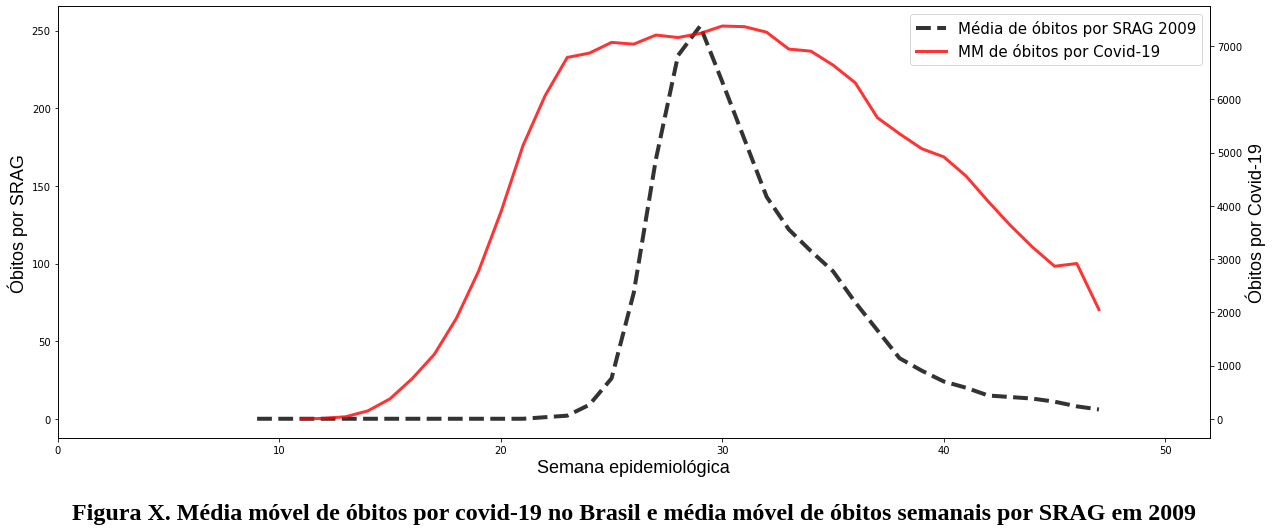

In [47]:
fig= plt.figure(figsize=(16,6))

line_weight=3
alpha=0.8
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes()

ax2 = ax1.twinx()


lns1 = ax1.plot(full['srag_2009'], color='black', linestyle='dashed', 
                lw=4, alpha=alpha, label='Média de óbitos por SRAG 2009')
lns2 = ax2.plot(full['media_movel_obitos'], color='red', 
                lw=line_weight, alpha=alpha, label='MM de óbitos por Covid-19')

ax1.set_ylabel('Óbitos por SRAG', fontsize=18, fontname="Liberation Sans")
ax2.set_ylabel('Óbitos por Covid-19', fontsize=18, fontname="Liberation Sans")
ax1.set_xlabel('Semana epidemiológica', fontsize=18, fontname="Liberation Sans")
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best', prop=dict(size=15))


plt.title('Figura X. Média móvel de óbitos por covid-19 no Brasil e média móvel de óbitos semanais por SRAG em 2009',
          fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.2)
plt.xlim((0,52))
# plt.grid()
plt.show()

<font color='blue'> >> </font> Notamos como as semanas epidemiológicas de início dos óbitos diferem entre as duas pandemias*. Interessantemente, o crescimento dos casos parece ser semelhante.

***Obs**: A base de dados InfoGripe começa os registros no ano de 2009. Possivelmente, a coleta de informações de SRAG não era feita de forma tão precisa antes desse período.

### Óbitos Covid-19 BRASIL versus óbitos SRAG 2016

Média móvel de óbitos por covid-19 (2020) versus mortes semanais por SRAG em 2016, ano epidêmico de H1N1

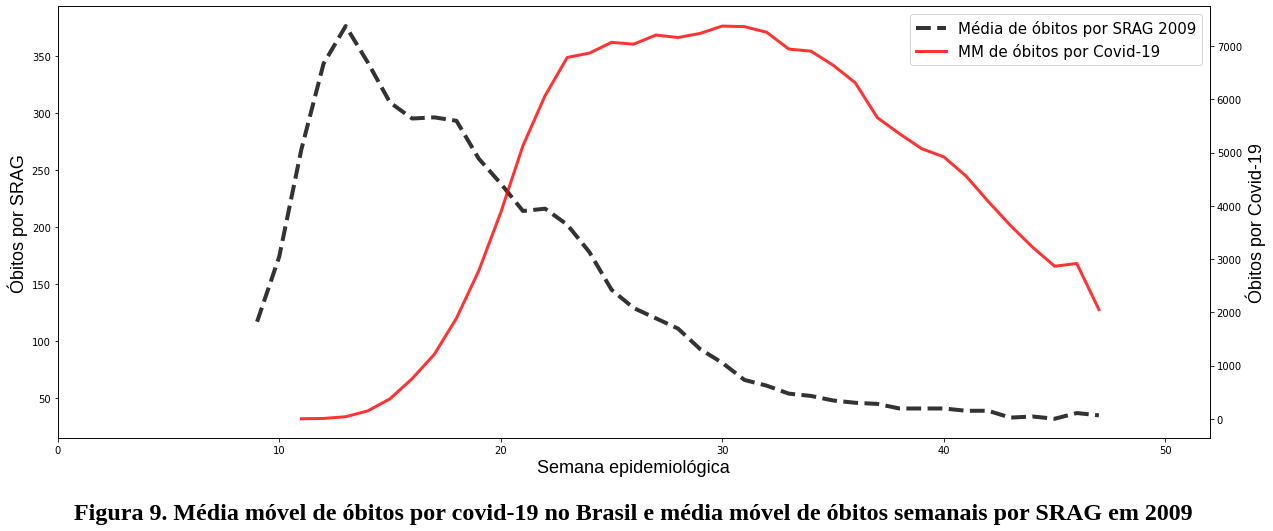

In [48]:
fig= plt.figure(figsize=(16,6))

line_weight=3
alpha=0.8
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes()

ax2 = ax1.twinx()


lns1 = ax1.plot(full['srag_2016'], color='black', linestyle='dashed', 
                lw=4, alpha=alpha, label='Média de óbitos por SRAG 2009')
lns2 = ax2.plot(full['media_movel_obitos'], color='red', 
                lw=line_weight, alpha=alpha, label='MM de óbitos por Covid-19')

ax1.set_ylabel('Óbitos por SRAG', fontsize=18, fontname="Liberation Sans")
ax2.set_ylabel('Óbitos por Covid-19', fontsize=18, fontname="Liberation Sans")
ax1.set_xlabel('Semana epidemiológica', fontsize=18, fontname="Liberation Sans")
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best', prop=dict(size=15))


plt.title('Figura 9. Média móvel de óbitos por covid-19 no Brasil e média móvel de óbitos semanais por SRAG em 2009',
          fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.2)
plt.xlim((0,52))
# plt.grid()
plt.show()

##  <font color='red'> >> </font> E se avaliarmos os óbitos por covid relatados na base InfoGripe? O comportamento das curvas serão os mesmos?

In [49]:
obito_covid = gripe_pais.query("dado == 'obitocovid'")

In [50]:
obito_covid = obito_covid.query('`Ano epidemiológico` == "2020"')

In [51]:
obito_covid.set_index('Semana epidemiológica', inplace=True)

Foi necessário fatiar o DF criado para plotagem pois os óbitos de SRACOVID estavam classificados da semana 1 a 44, enquanto que na base Brasil.io da  semana 9 a 47.

In [52]:
print(len(obito_covid.loc[9:44]), len(full.loc[8:44]))

36 36


In [53]:
full_slice = full.loc[8:44]

obito_covid_slice = obito_covid.loc[9:44]

full_slice['obito_sra_covid'] = obito_covid_slice['média móvel']

In [54]:
full_slice.head(2)

,new_confirmed,new_deaths,media_movel_obitos,media_movel_casos,srag_h1n1,srag_2009,srag,srag_2016,obito_sra_covid
epidemiological_week,,,,,,,,,
9,2,0,NaN,NaN,NaN,0.0,23.777778,117.0,24.0
10,17,0,NaN,NaN,NaN,0.0,24.888889,174.0,100.0


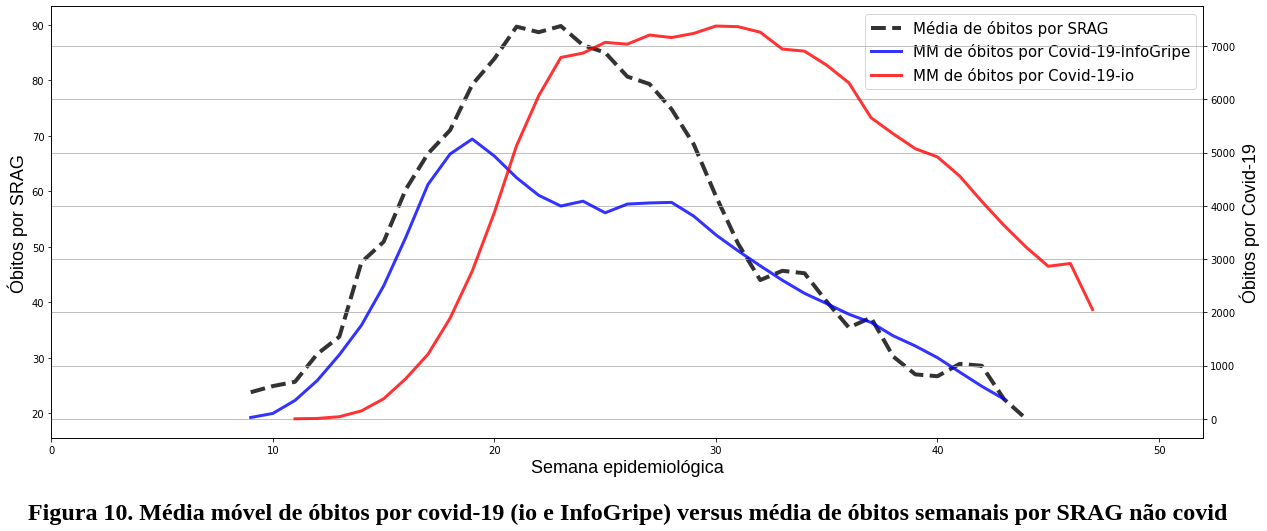

In [55]:
fig= plt.figure(figsize=(16,6))

line_weight=3
alpha=0.8
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes()

ax2 = ax1.twinx()


lns1 = ax1.plot(full_slice['srag'], color='black', linestyle='dashed', 
                lw=4, alpha=alpha, label='Média de óbitos por SRAG' )
lns2 = ax2.plot(full_slice['obito_sra_covid'], color='blue', 
                lw=line_weight, alpha=alpha, label='MM de óbitos por Covid-19-InfoGripe' )
lns3 = ax2.plot(full['media_movel_obitos'], color='red', 
                lw=line_weight, alpha=alpha, label='MM de óbitos por Covid-19-io' )

ax1.set_ylabel('Óbitos por SRAG', fontsize=18, fontname="Liberation Sans")
ax2.set_ylabel('Óbitos por Covid-19', fontsize=18, fontname="Liberation Sans")
ax1.set_xlabel('Semana epidemiológica', fontsize=18, fontname="Liberation Sans")
leg = lns1 + lns2 + lns3
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='best', prop=dict(size=15))


plt.title('Figura 10. Média móvel de óbitos por covid-19 (io e InfoGripe) versus média de óbitos semanais por SRAG não covid',
          fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.2)
plt.xlim((0,52))
plt.grid()
plt.show()

<font color='blue'> >> </font> Notamos aqui diferenças entre as duas bases de dados. Provávelmente, essa diferença se dá pelo modo de coleta das informações, periodicidade de atualizações, entre outros.
*** 
O que mais chama a atenção é como os dados de **óbito por SRAG (InfoGripe)** (de 2009 a 2020, sem anos epidêmicos) tem distribuição nas semanas epidemiológicas bastante semelhante ao dado de <font color='Blue'> óbitos por covid-19 (InfoGripe) </font>, enquanto essa semelhança não se repete quando comparamos com os <font color='Red'> óbitos por covid registrados na base Brasil.IO </font>.
***
Apesar das diferenças, notamos como essas curvas se comportam de maneira semelhante. 

# Conclusões

A pandemia de covid-19 apresentou diversos desafaios para a sociedade, causando perdas irreparáveis. Ainda assim muitos minimizam e descreditam a ciência. <br>
Meu trabalho teve com objetivo avaliar a sazonalidade de óbitos por SRAG, comparado-a com os óbitos por covid-19. Apesar de termos apenas registros de 2020, o SarS-CoV2 aparenta também seguir uma forma de tranmissão sazonal. Isso também já foi reportado por outros coronavírus que causam sintomas mais brandos. <br>
Assim, temos que nos preparar para o futuro e somente a colaboração de TODOS na sociedade poderá minimizar as perdas desnecessárias.

# Perspectivas para próximos estudos

### E quanto aos estados?
<font color='Red'> >>> </font> Será que os estados com maior número de óbitos por SRAG-não covid, também são os mesmos mais afetados por Covid-19 em 2020?
### Quão semelhantes são as curvas epidemiológicas de covid e SRAG epidêmica e não epidêmca?
<font color='Red'> >>> </font> Analisar estatisticamente a aceleração dessas curvas e o coeficiente de variação.<br>
Alguns links para estudo:
 1. [Vetor Aceleração](https://www.respondeai.com.br/conteudo/calculo/curvas-e-superficies/vetor-aceleracao/366);
 2. [Estatística Descritiva[1]](https://medium.com/@naiaracerqueira/estat%C3%ADstica-descritiva-1-ed523dffb99f).

### É possível modelar futuros comportamentos de SRAG baseado nos dados disponíveis?
<font color='Red'> >>> </font> Ainda não sei como fazer, mas gostaria de treinar esse tipo de inferência. Esse tipo de análise tem várias limitações, principalmente considerando o contexto de pandemia que nos encontramos, porém servirá como uma ótima oportunidade de aprendizado.

### Como o movimento das pessoas se relaciona com os casos de covid-19?
<font color='red'> >> </font> Utilizar os [registros](https://www.google.com/covid19/mobility/) de movimentação do google para avaliar.
